# Using 20CRV3 to Caclulate the OMI MJO

##### Jonathan Jurgens and Scott Burgholzer

In [15]:
from pathlib import Path
import os.path

# We are using the mjoindices package, so make sure it is installed before running!
# Hoffmann, C.G., Kiladis, G.N., Gehne, M. and von Savigny, C., 2021. 
#    A Python Package to Calculate the OLR-Based Index of the Madden- Julian-Oscillation (OMI) 
#    in Climate Science and Weather Forecasting. Journal of Open Research Software, 9(1), 
#    p.9. DOI: http://doi.org/10.5334/jors.331
import mjoindices.olr_handling as olr
import mjoindices.omi.omi_calculator as omi
import mjoindices.empirical_orthogonal_functions as eof
import mjoindices.principal_components as pc
import mjoindices.evaluation_tools

import numpy as np
import xarray as xr
import pandas as pd

# for the interactive
from ipywidgets import interact, interactive, IntSlider
from IPython.display import clear_output, display, HTML
from IPython.display import Image
from IPython.core.display import HTML
import matplotlib.pyplot as plt

#### Set Up Variables Needed for Calculations

In [47]:
# Where the daily OLR values are
olr_data_filename = Path(os.path.abspath('/home/scratch/sburgholzer/daily_olr_1836_2015_rename.nc'))

# The Original MJO Data Location
originalOMIDataDirname = Path(os.path.abspath('')) / "MJO_Data" / "OriginalOMI"

# The Original PC Values Location
originalOMIPCFile = Path(os.path.abspath('')) / "MJO_Data" / "OriginalOMI" / "omi.1x.txt"

# We will be saving our calculated data in these locations
restrictedOLRDataSave = Path(os.path.abspath('')) / "MJO_Data" / "CalculatedData" / 'olr.npz'
calceof = Path(os.path.abspath('')) / "MJO_Data" / "CalculatedData" / 'EOFs_new.npz'
calcpc = Path(os.path.abspath('')) / "MJO_Data" / "CalculatedData" / 'PCs_new.txt'

original_omi_explained_variance_file = Path(os.path.abspath('')) / "MJO_Data" / "OriginalOMI" / "omi_var.txt"

# Some Data (original OMI) from: https://doi.org/10.5281/zenodo.3746562

#### Get the OLR Data and Save it

In [ ]:
# Load in the OLR Dataset, make sure you rename ulwrf to olr for the package
raw_olr = olr.load_noaa_interpolated_olr_netcdf4(olr_data_filename)
# This restricts the data to the original caluclation boundaries
interpolated_olr = olr.interpolate_spatial_grid_to_original(raw_olr)
# save the OLR DATA
interpolated_olr.save_to_npzfile(restrictedOLRDataSave)

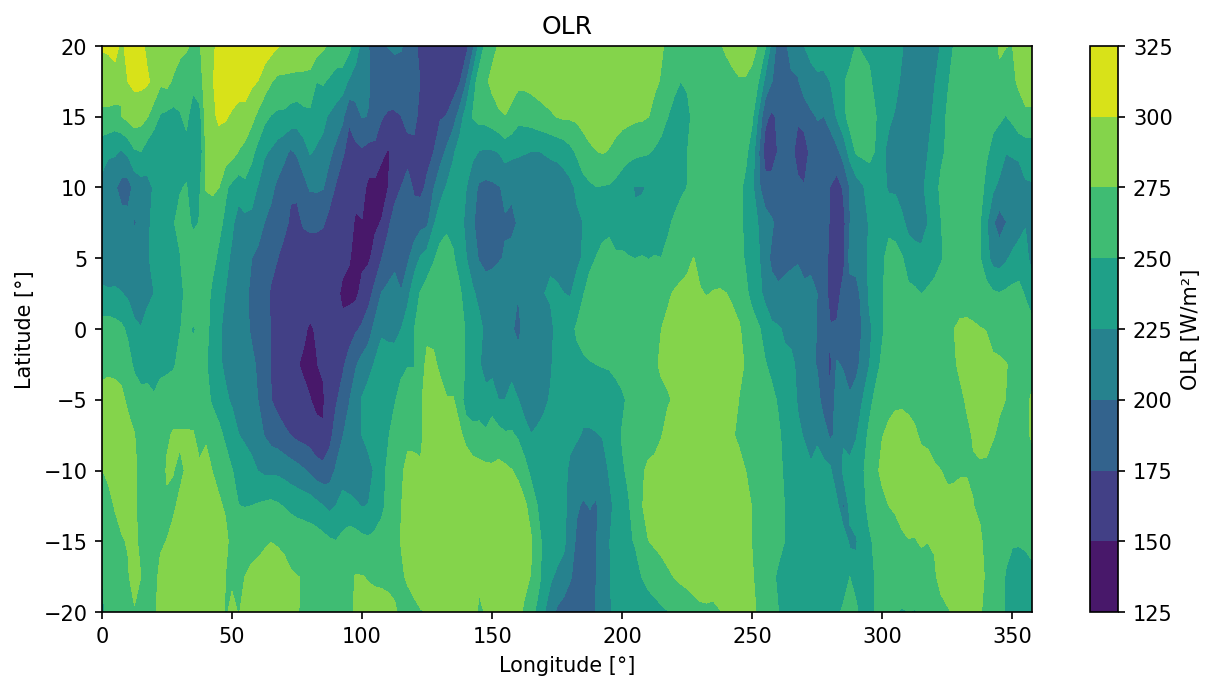

In [3]:
# Load in the saved NPZ File to get the OLR data
interpolated_olr = olr.restore_from_npzfile(restrictedOLRDataSave)
# Lets take a look
fig = olr.plot_olr_map_for_date(interpolated_olr, np.datetime64("1992-06-02"))
fig.show()

#### Calculate the EOFs

In [ ]:
eofs = omi.calc_eofs_from_olr(interpolated_olr,
                             sign_doy1reference=False, #True
                             interpolate_eofs=False, #True
                             strict_leap_year_treatment=False)
eofs.save_all_eofs_to_npzfile(eofnpzfile)

#### Calculate the PCs

In [4]:
olr_data = olr.load_noaa_interpolated_olr_netcdf4(olr_data_filename)
eofs = eof.restore_all_eofs_from_npzfile(calceof)

In [6]:
pcs = omi.calculate_pcs_from_olr(olr_data,
                                 eofs,
                                 np.datetime64("1836-01-01"),
                                 np.datetime64("2015-12-31"),
                                 use_quick_temporal_filter=False)
pcs.save_pcs_to_txt_file(calcpc)

Smooth data temporally and longitudinally...
Filtering for latitude:  -20.0
Filtering for latitude:  -17.5
Filtering for latitude:  -15.0
Filtering for latitude:  -12.5
Filtering for latitude:  -10.0
Filtering for latitude:  -7.5
Filtering for latitude:  -5.0
Filtering for latitude:  -2.5
Filtering for latitude:  0.0
Filtering for latitude:  2.5
Filtering for latitude:  5.0
Filtering for latitude:  7.5
Filtering for latitude:  10.0
Filtering for latitude:  12.5
Filtering for latitude:  15.0
Filtering for latitude:  17.5
Filtering for latitude:  20.0


#### Statistics

In [3]:
eofs = eof.restore_all_eofs_from_npzfile(calceof)
orig_eofs = eof.load_all_original_eofs_from_directory(originalOMIDataDirname)

In [4]:
doy=23
setting_exclude_doy_366 = True

EOFs stats

########## Summary of EOF comparison for all DOYs (EOF 1)
Worst Correlation (at DOY 128): -0.7931
Worst 99% percentile (at DOY 133): 0.1305
Worst 68% percentile (at DOY 115): 0.0319
########## Summary of EOF comparison for all DOYs (EOF 2)
Worst Correlation (at DOY 128): -0.8155
Worst 99% percentile (at DOY 120): 0.0984
Worst 68% percentile (at DOY 129): 0.0364


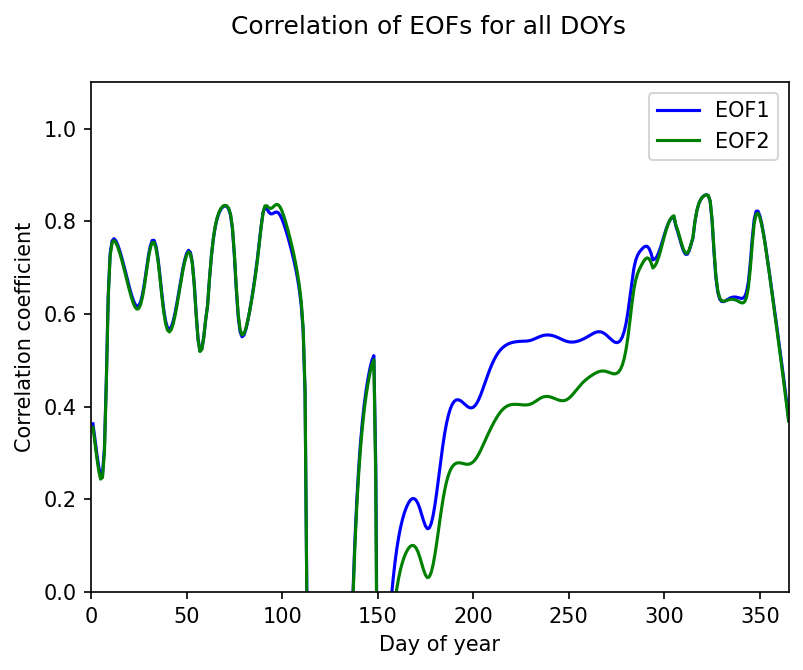

In [5]:
fig = mjoindices.evaluation_tools.plot_correlation_for_eofs_all_doys(eofs, orig_eofs, exclude_doy366=setting_exclude_doy_366, do_print=True)
fig.show()

########## Summary of EOF comparison for all DOYs (EOF 1)
Worst Correlation (at DOY 128): -0.7931
Worst 99% percentile (at DOY 133): 0.1305
Worst 68% percentile (at DOY 115): 0.0319
########## Summary of EOF comparison for all DOYs (EOF 2)
Worst Correlation (at DOY 128): -0.8155
Worst 99% percentile (at DOY 120): 0.0984
Worst 68% percentile (at DOY 129): 0.0364


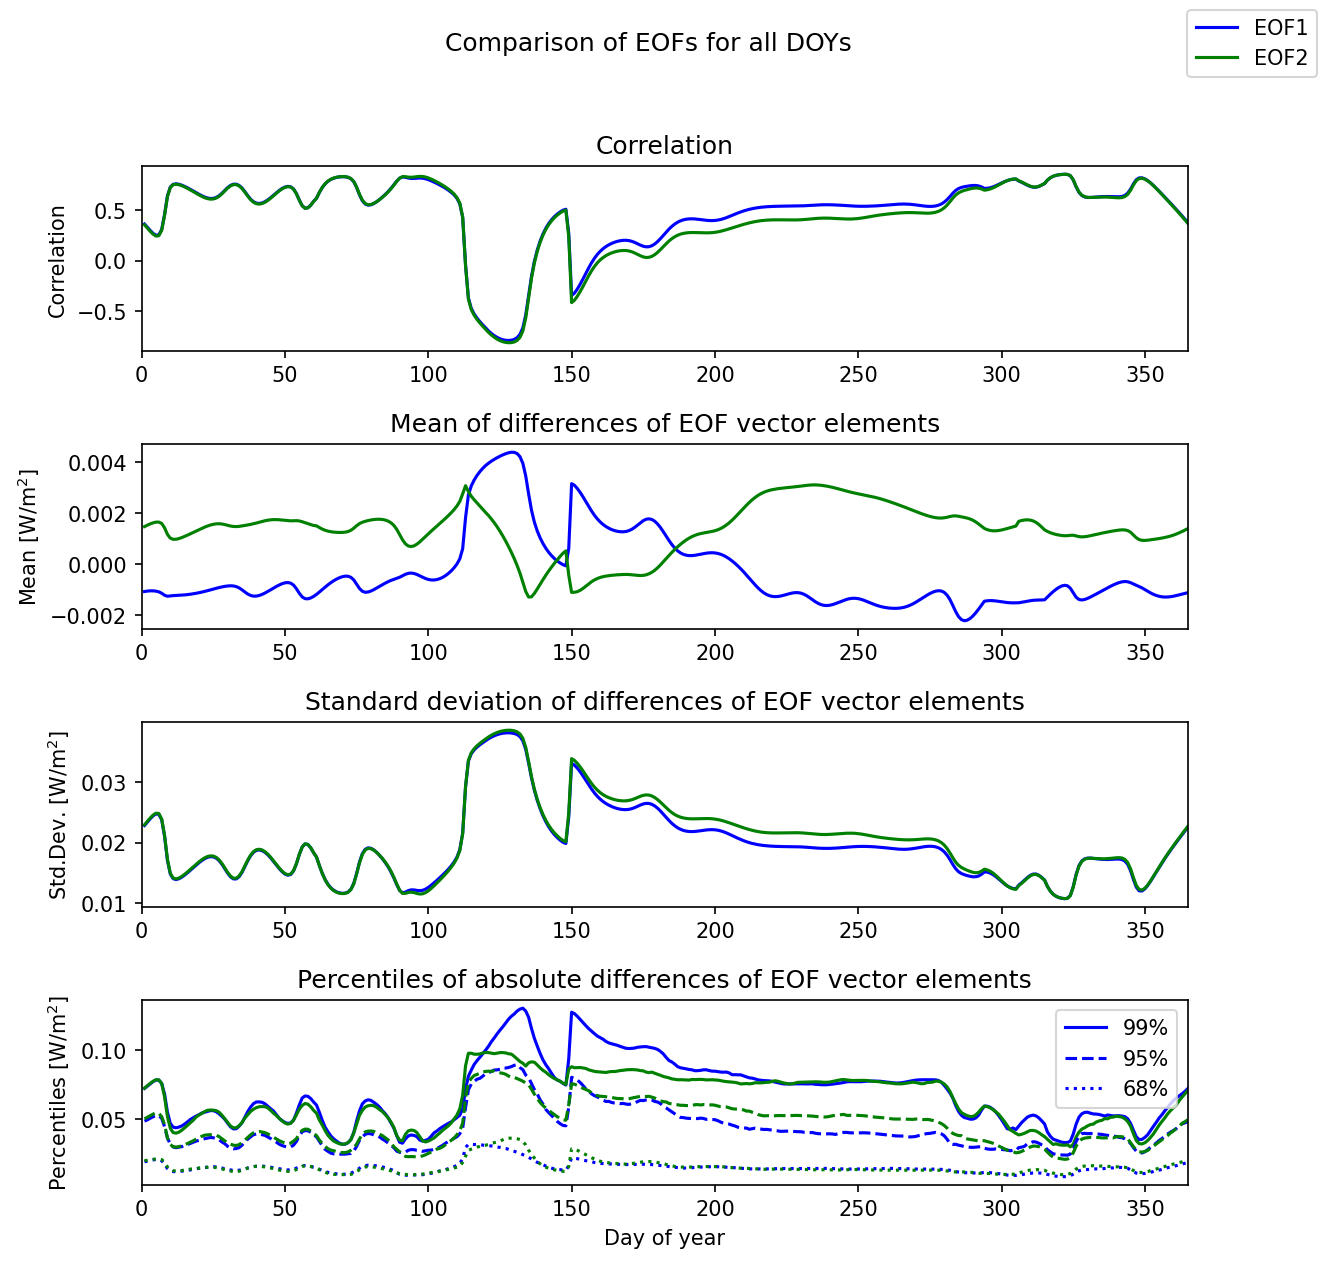

In [6]:
fig = mjoindices.evaluation_tools.plot_comparison_stats_for_eofs_all_doys(eofs, orig_eofs, exclude_doy366=setting_exclude_doy_366, do_print=True)
fig.show()

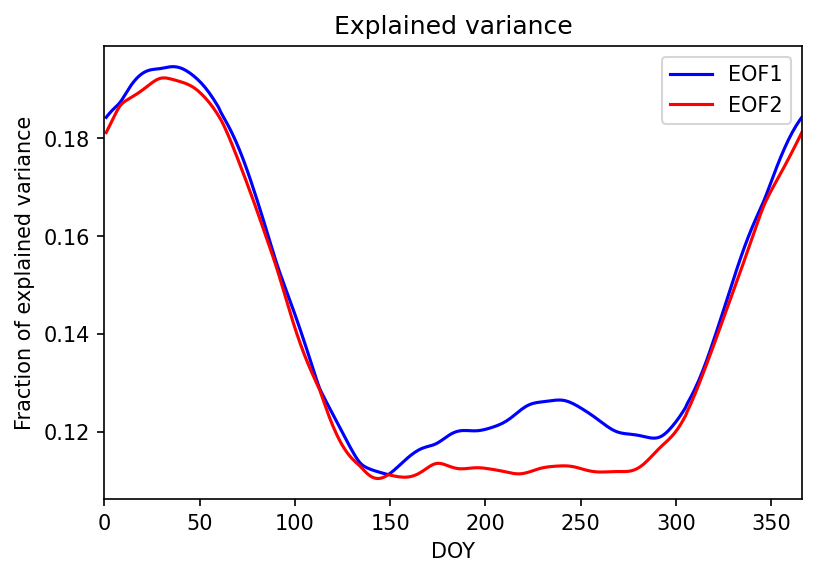

In [7]:
fig = eof.plot_explained_variance_for_all_doys(eofs, include_no_observations=False)
fig.show()

##########
Explained Variance for EOF1
###### DOY 366 excluded
##########
Explained Variance for EOF1
CorrelationCoefficient: 0.7847
Mean of difference: -0.0030
Stddev. of difference: 0.0201
68% Percentile (abs. value of differences: 0.0238
95% Percentile (abs. value of differences: 0.0287
99% Percentile (abs. value of differences: 0.0300


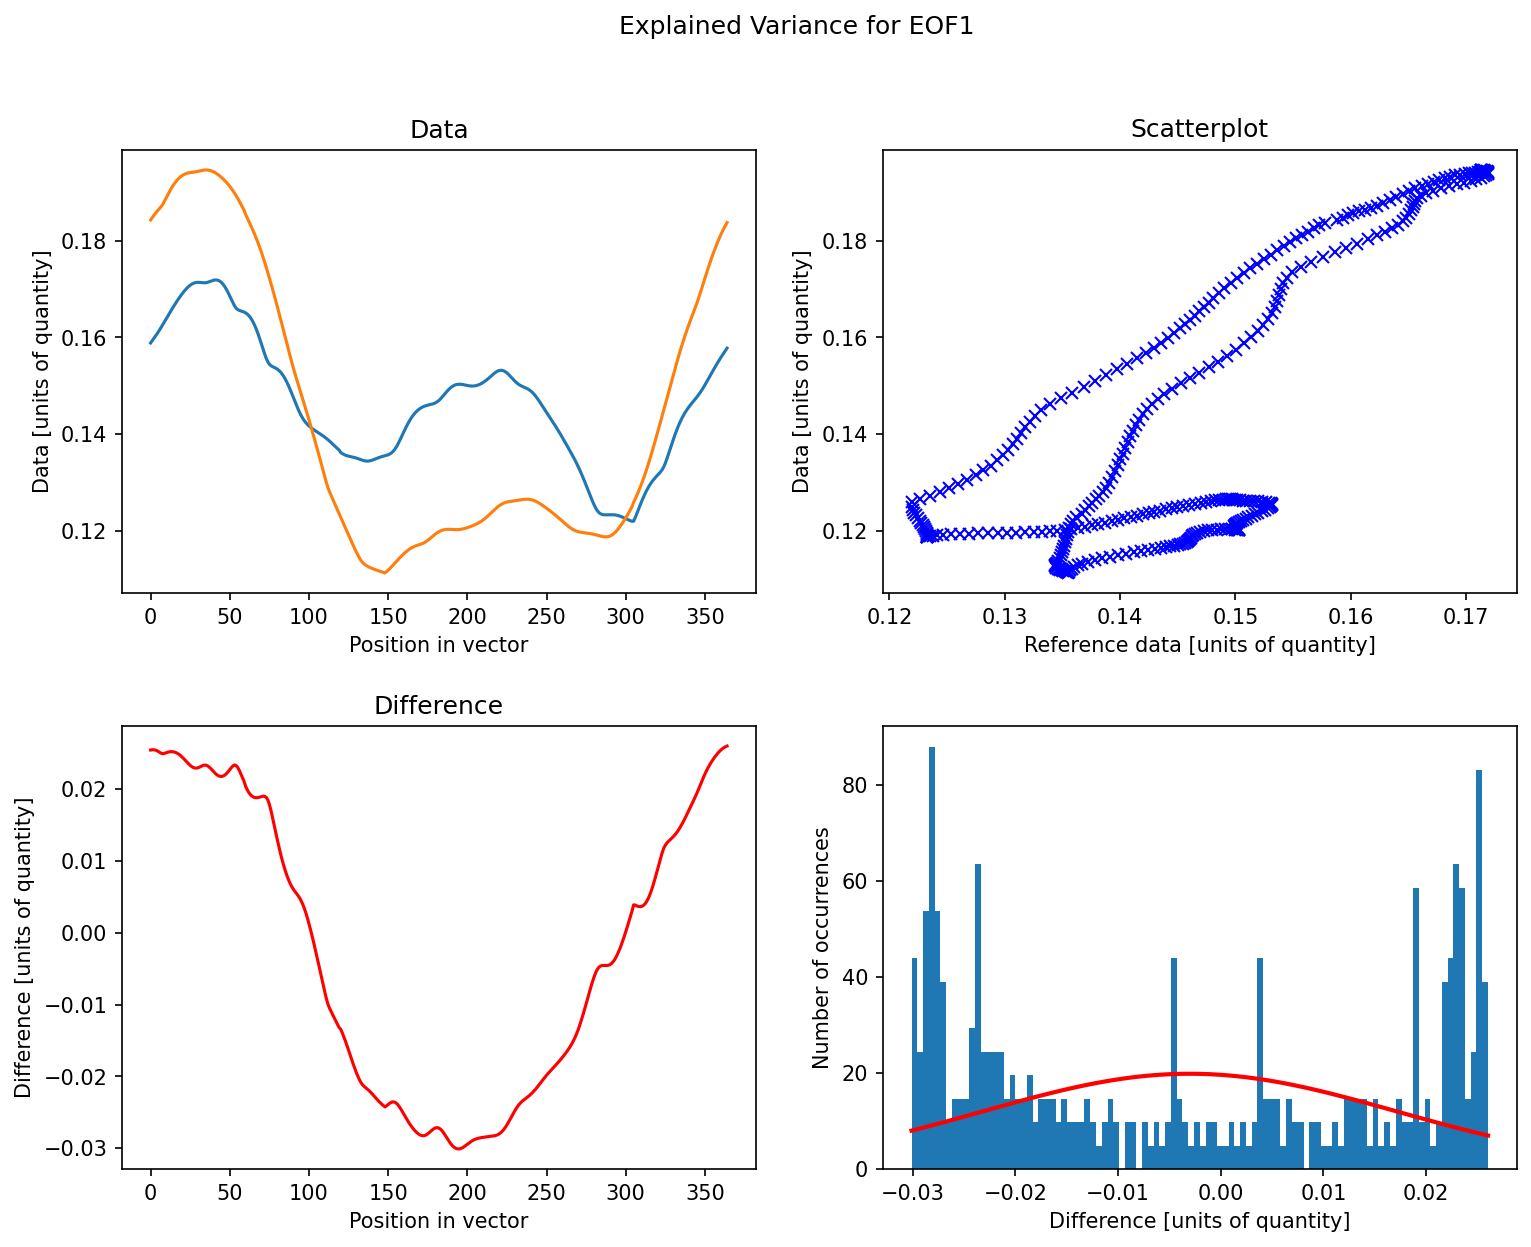

In [8]:
orig_explained_variance_1, orig_explained_variance_2 = mjoindices.evaluation_tools.load_omi_explained_variance(original_omi_explained_variance_file)
fig = mjoindices.evaluation_tools.plot_comparison_stats_for_explained_variance(orig_explained_variance_1, eofs.explained_variance1_for_all_doys(), title="Explained Variance for EOF1", do_print=True, exclude_doy366=setting_exclude_doy_366)
fig.show()

##########
Explained Variance for EOF2
###### DOY 366 excluded
##########
Explained Variance for EOF2
CorrelationCoefficient: 0.8319
Mean of difference: -0.0008
Stddev. of difference: 0.0207
68% Percentile (abs. value of differences: 0.0250
95% Percentile (abs. value of differences: 0.0296
99% Percentile (abs. value of differences: 0.0312


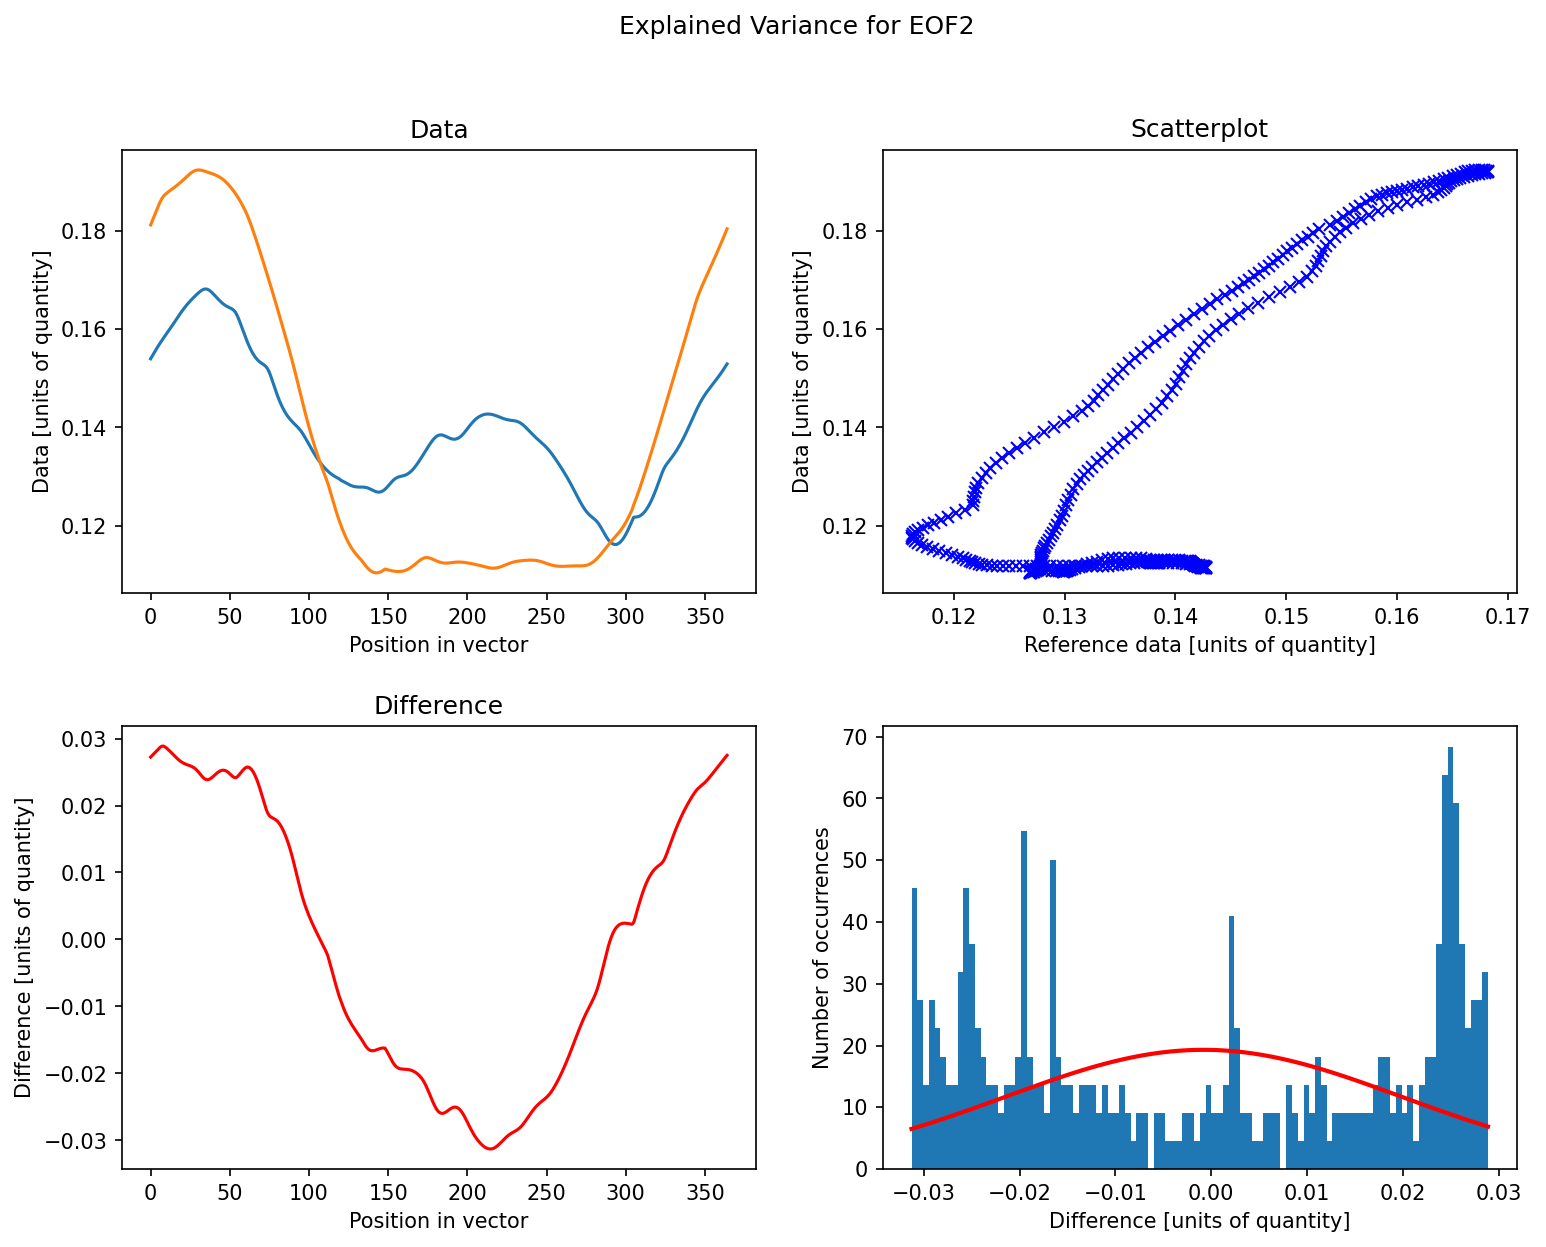

In [9]:
orig_explained_variance_1, orig_explained_variance_2 = mjoindices.evaluation_tools.load_omi_explained_variance(original_omi_explained_variance_file)
fig = mjoindices.evaluation_tools.plot_comparison_stats_for_explained_variance(orig_explained_variance_2, eofs.explained_variance2_for_all_doys(), title="Explained Variance for EOF2", do_print=True, exclude_doy366=setting_exclude_doy_366)
fig.show()

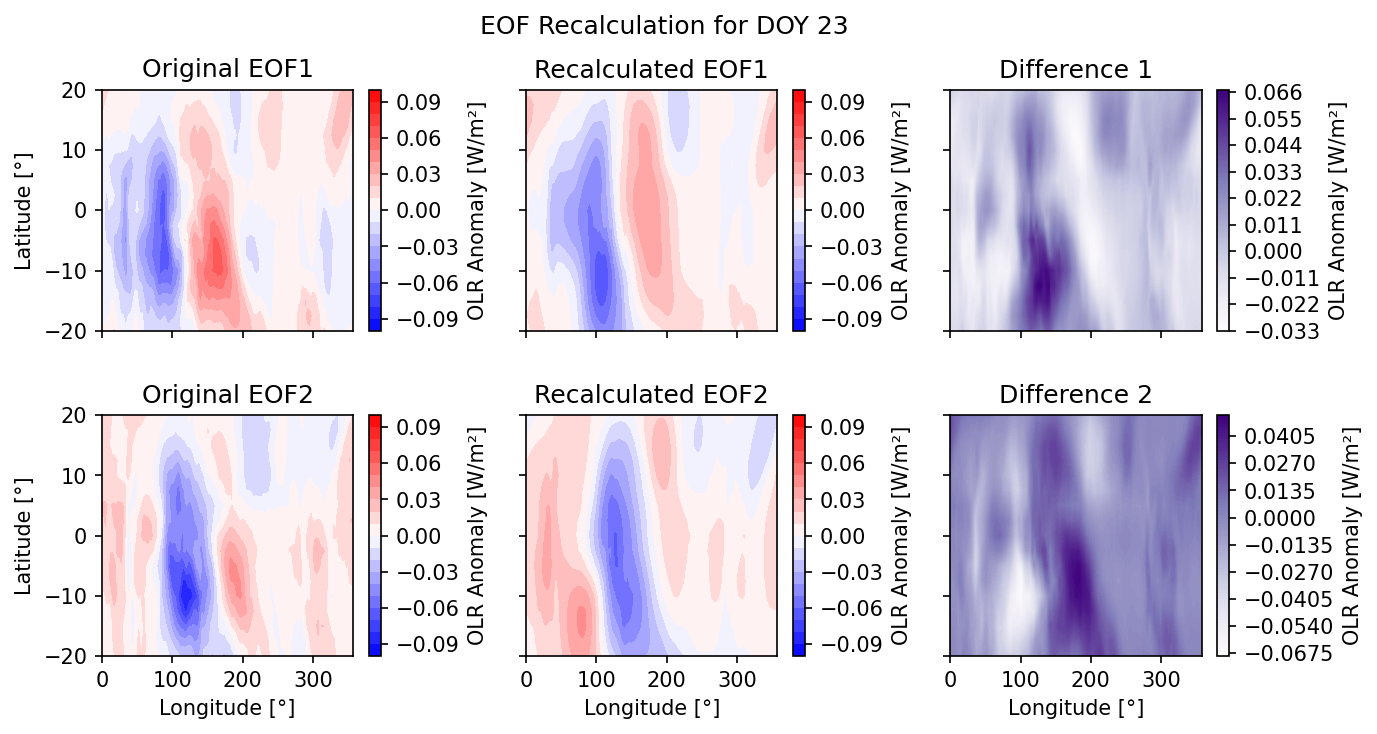

In [10]:
fig = mjoindices.evaluation_tools.plot_individual_eof_map_comparison(orig_eofs.eofdata_for_doy(doy), eofs.eofdata_for_doy(doy), doy=doy)
fig.show()

##########
EOF1 for DOY 23
CorrelationCoefficient: 0.6217
Mean of difference: -0.0010
Stddev. of difference: 0.0176
68% Percentile (abs. value of differences: 0.0153
95% Percentile (abs. value of differences: 0.0364
99% Percentile (abs. value of differences: 0.0558


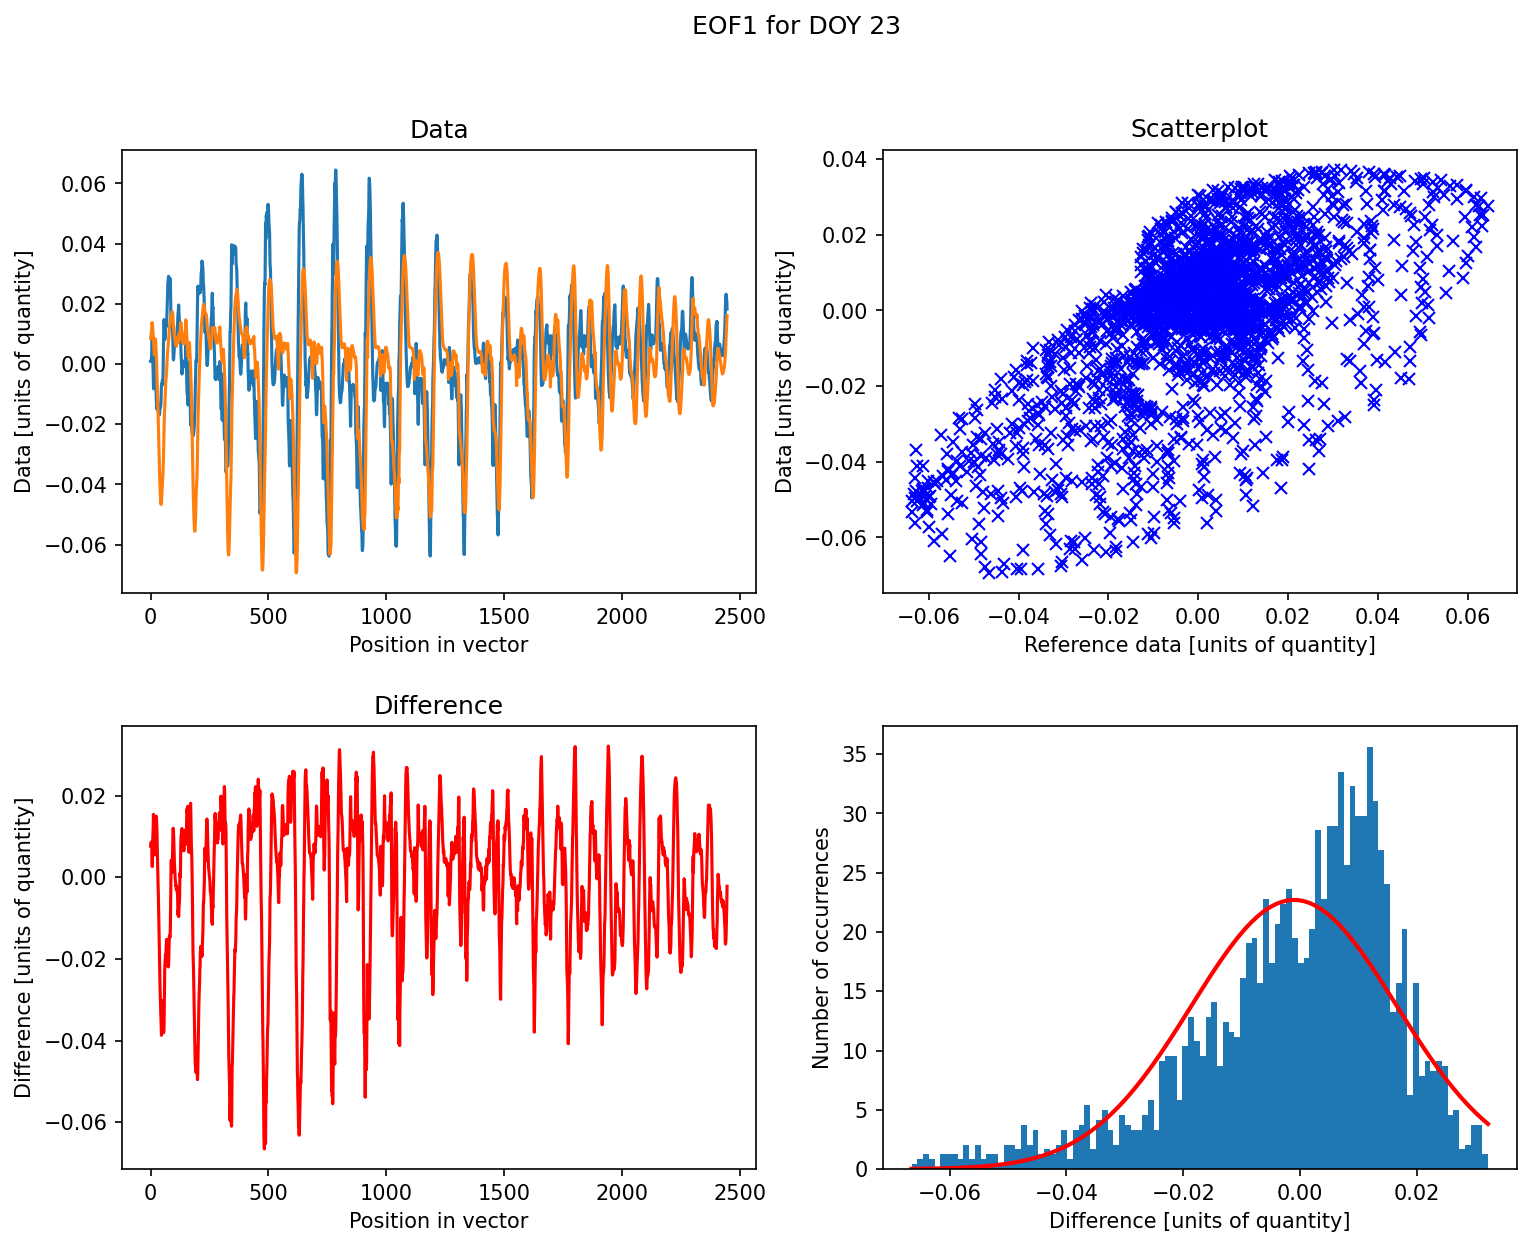

In [11]:
fig = mjoindices.evaluation_tools.plot_vector_agreement(orig_eofs.eof1vector_for_doy(doy), eofs.eof1vector_for_doy(doy), title="EOF1 for DOY %i" % doy, do_print=True)
fig.show()

##########
EOF2 for DOY 23
CorrelationCoefficient: 0.6154
Mean of difference: 0.0015
Stddev. of difference: 0.0177
68% Percentile (abs. value of differences: 0.0153
95% Percentile (abs. value of differences: 0.0387
99% Percentile (abs. value of differences: 0.0565


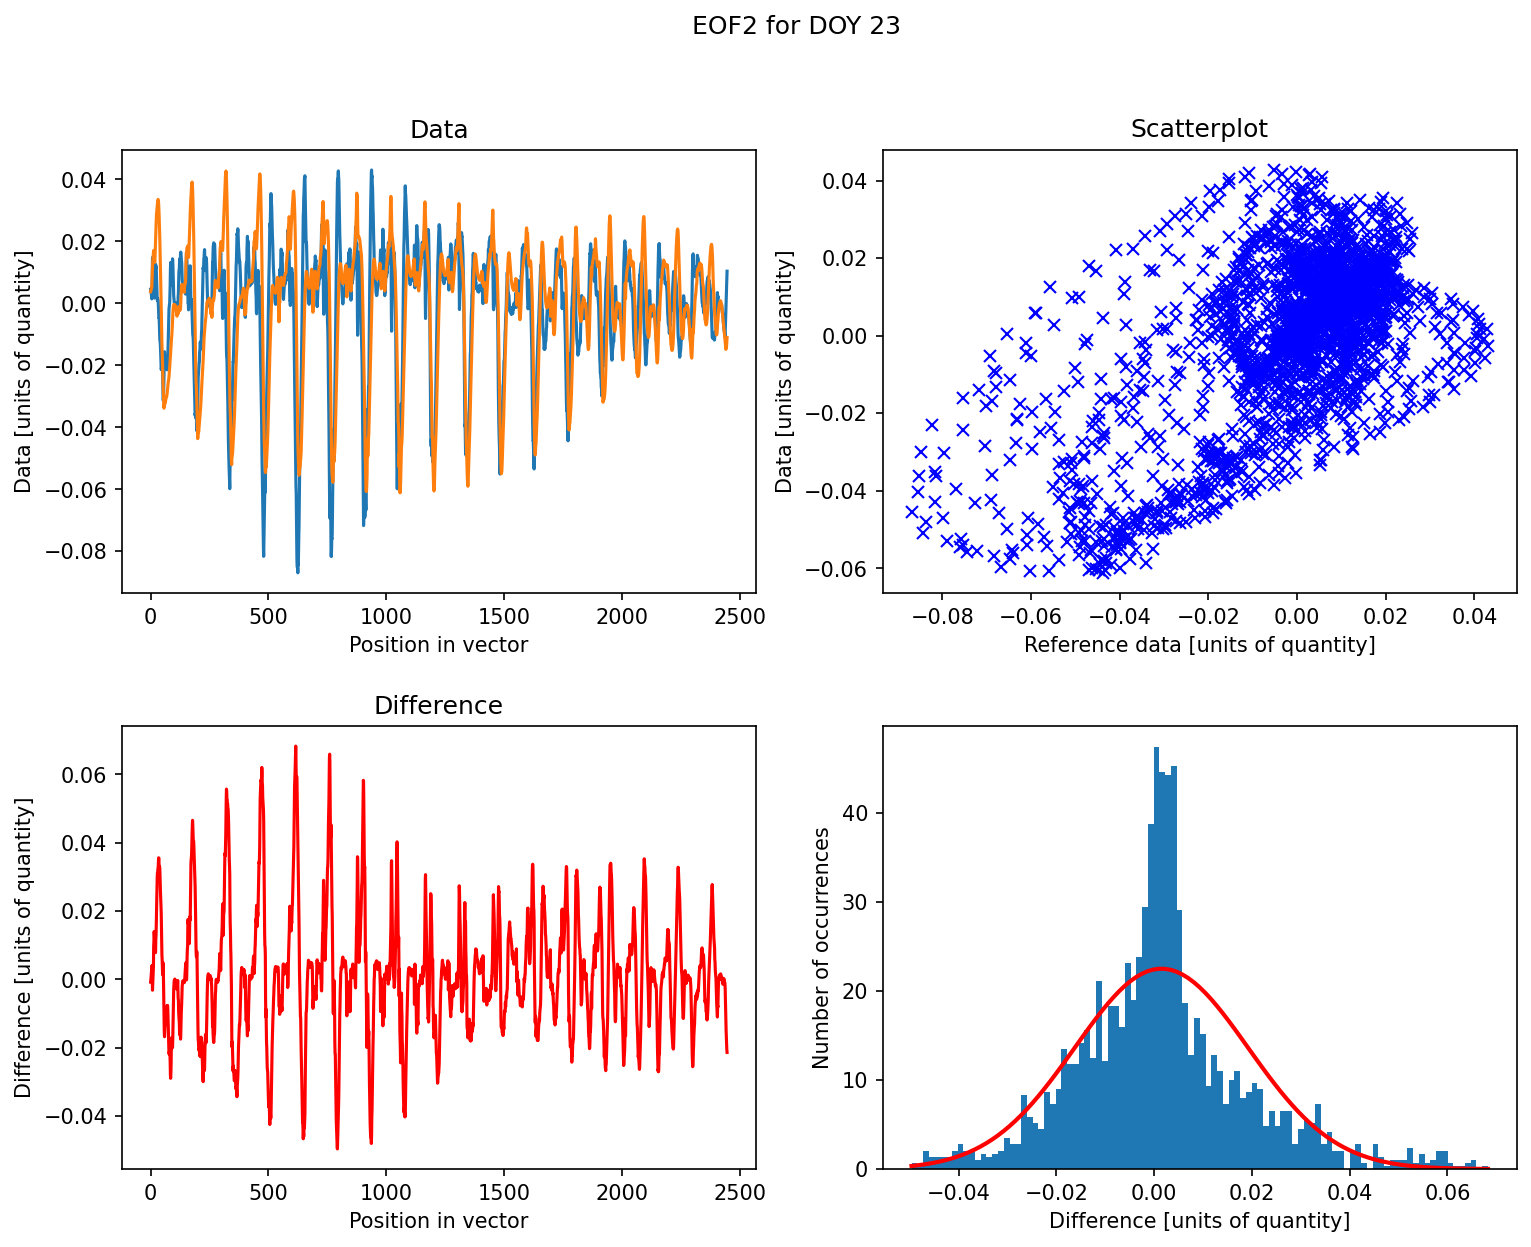

In [12]:
fig = mjoindices.evaluation_tools.plot_vector_agreement(orig_eofs.eof2vector_for_doy(doy), eofs.eof2vector_for_doy(doy), title="EOF2 for DOY %i" % doy, do_print=True)
fig.show()

PC stats

In [13]:
pcs = pc.load_pcs_from_txt_file(calcpc)
orig_pcs = pc.load_original_pcs_from_txt_file(originalOMIPCFile)

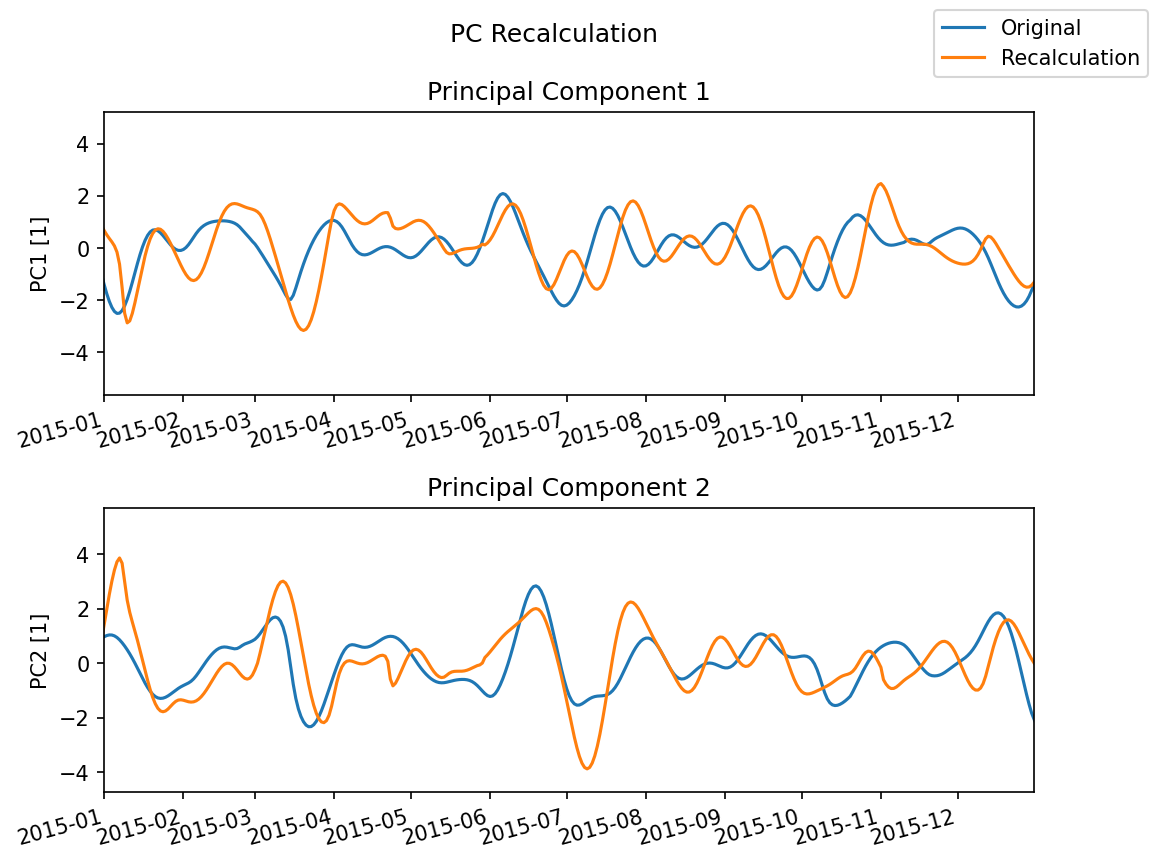

In [36]:
pc_plot_period_start=np.datetime64("2015-01-01")
pc_plot_period_stop=np.datetime64("2015-12-31")
fig = mjoindices.evaluation_tools.plot_comparison_orig_calc_pcs(pcs, orig_pcs, start_date=pc_plot_period_start, end_date=pc_plot_period_stop)
fig.show()

##########
PC1
##### Complete time series
CorrelationCoefficient: 0.4305
Mean of difference: -0.0316
Stddev. of difference: 1.2671
68% Percentile (abs. value of differences: 1.1254
95% Percentile (abs. value of differences: 2.5866
99% Percentile (abs. value of differences: 3.9430
###### DOY 366 excluded


/home/sburgholzer/.local/lib/python3.9/site-packages/mjoindices/evaluation_tools.py:478: UserWarning: The provided time series do not cover the same period.
The compared range was restricted to the overlapping period from 1979-01-01T00:00:00.000000000 to 2015-12-31T00:00:00.000000000.
Stronger differences may occur at least at the end of the compared period, since the temporal filtering worked on different samples.
  warnings.warn(message)


CorrelationCoefficient: 0.4302
Mean of difference: -0.0314
Stddev. of difference: 1.2669
68% Percentile (abs. value of differences: 1.1247
95% Percentile (abs. value of differences: 2.5868
99% Percentile (abs. value of differences: 3.9438


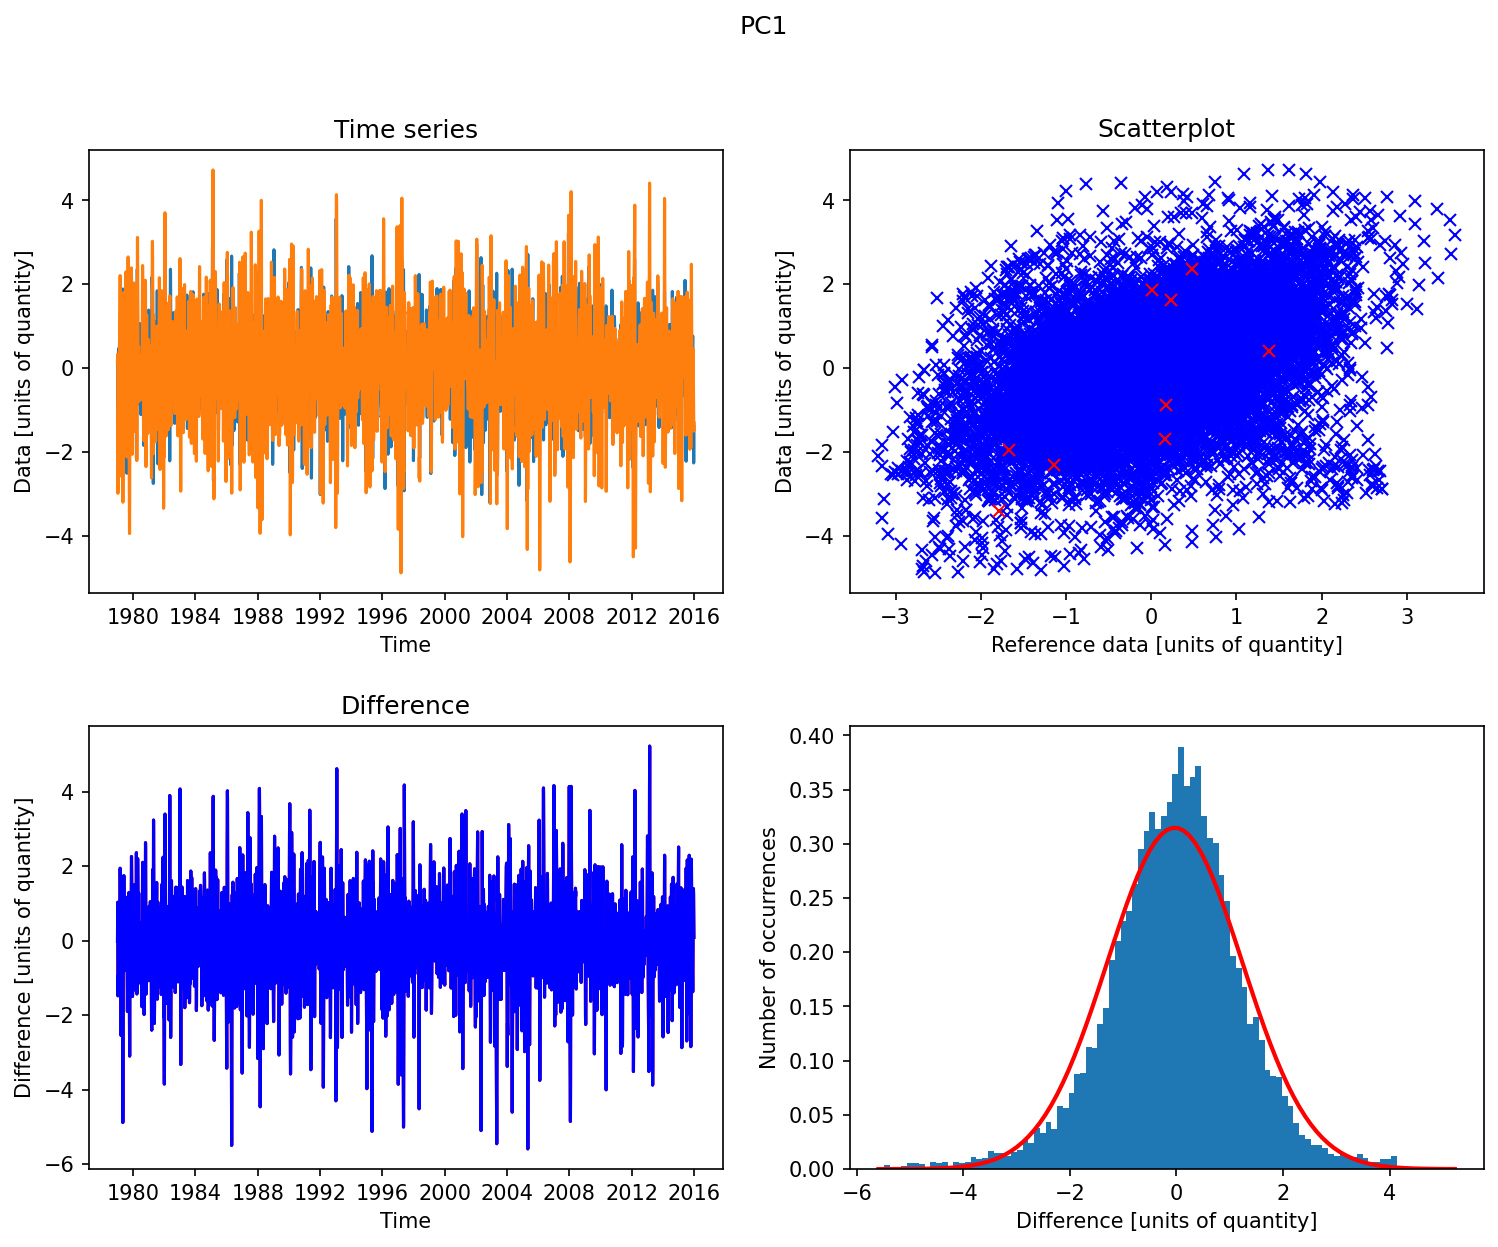

In [21]:
fig = mjoindices.evaluation_tools.plot_timeseries_agreement(orig_pcs.pc1, orig_pcs.time, pcs.pc1, pcs.time, title="PC1", do_print=True)
fig.show()

##########
PC2
##### Complete time series
CorrelationCoefficient: 0.3886
Mean of difference: 0.0040
Stddev. of difference: 1.2040
68% Percentile (abs. value of differences: 1.0399
95% Percentile (abs. value of differences: 2.5211
99% Percentile (abs. value of differences: 3.6297
###### DOY 366 excluded


/home/sburgholzer/.local/lib/python3.9/site-packages/mjoindices/evaluation_tools.py:478: UserWarning: The provided time series do not cover the same period.
The compared range was restricted to the overlapping period from 1979-01-01T00:00:00.000000000 to 2015-12-31T00:00:00.000000000.
Stronger differences may occur at least at the end of the compared period, since the temporal filtering worked on different samples.
  warnings.warn(message)


CorrelationCoefficient: 0.3899
Mean of difference: 0.0033
Stddev. of difference: 1.2025
68% Percentile (abs. value of differences: 1.0395
95% Percentile (abs. value of differences: 2.5183
99% Percentile (abs. value of differences: 3.6192


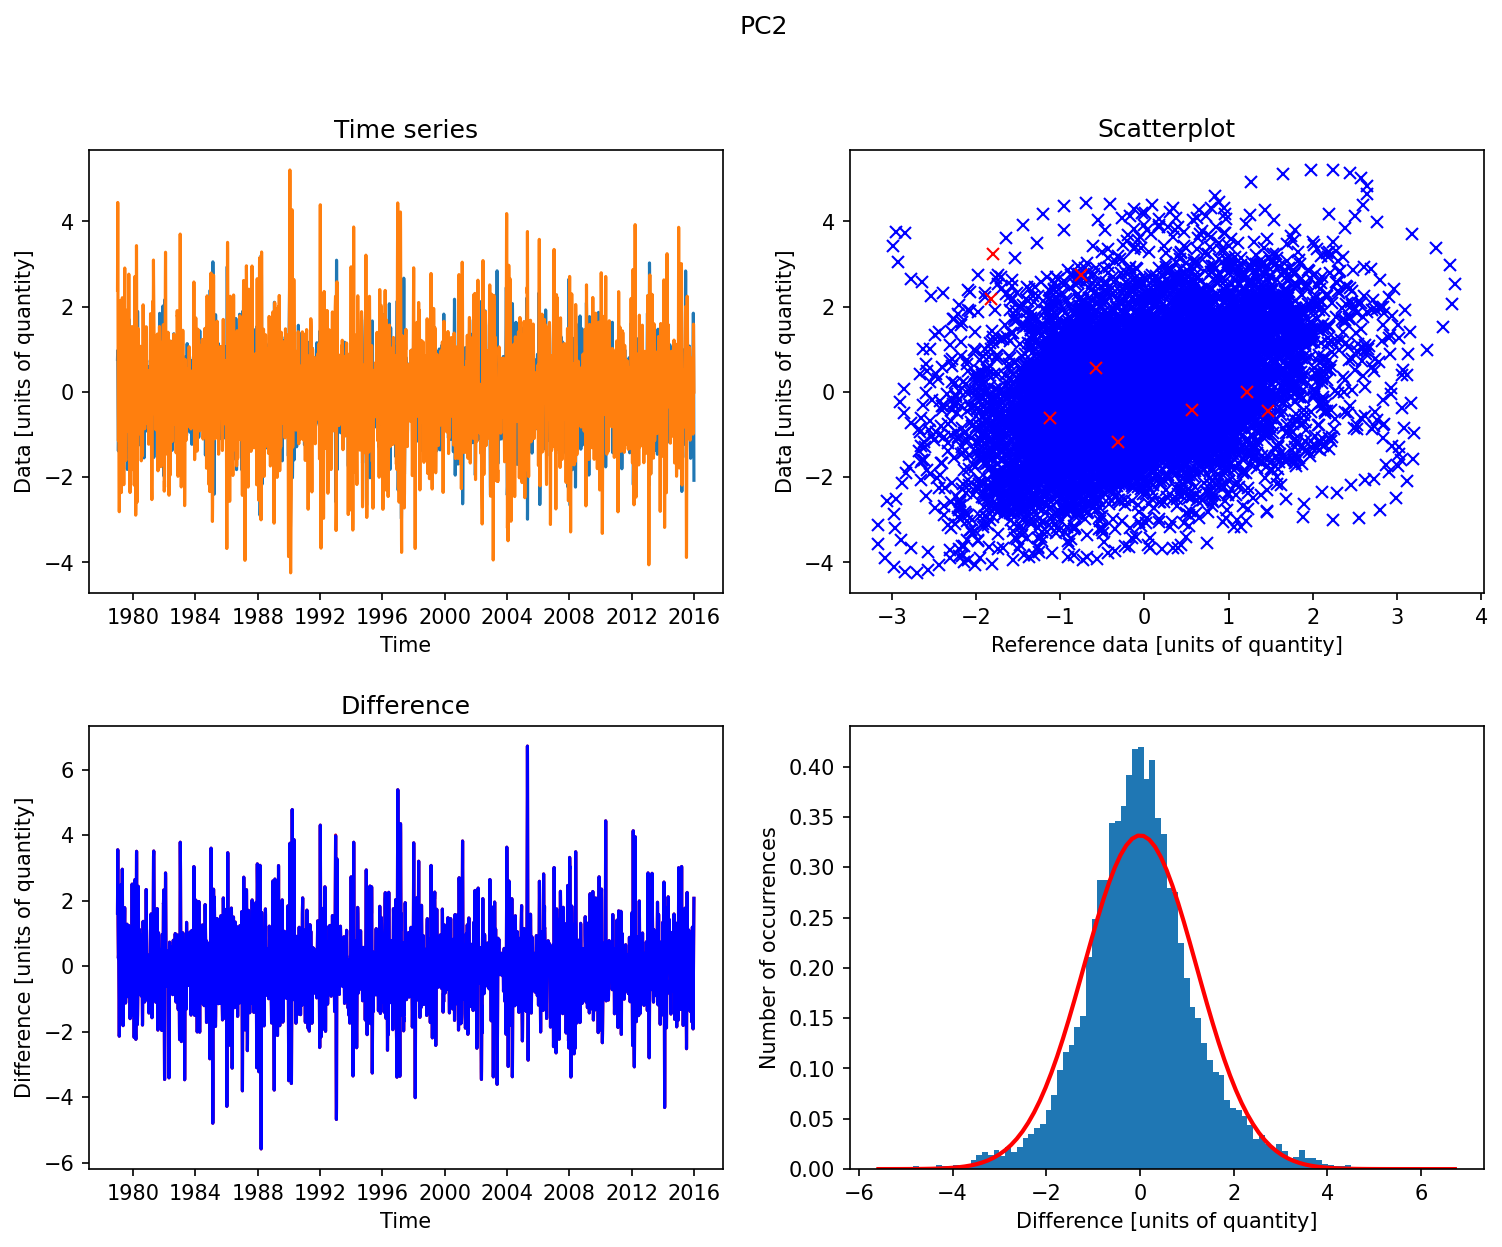

In [22]:
fig = mjoindices.evaluation_tools.plot_timeseries_agreement(orig_pcs.pc2, orig_pcs.time, pcs.pc2, pcs.time, title="PC2", do_print=True)
fig.show()

##########
MJO Strength
##### Complete time series
CorrelationCoefficient: 0.6307
Mean of difference: 0.3475
Stddev. of difference: 0.7032
68% Percentile (abs. value of differences: 0.7520
95% Percentile (abs. value of differences: 1.5829
99% Percentile (abs. value of differences: 2.1303
###### DOY 366 excluded


/home/sburgholzer/.local/lib/python3.9/site-packages/mjoindices/evaluation_tools.py:478: UserWarning: The provided time series do not cover the same period.
The compared range was restricted to the overlapping period from 1979-01-01T00:00:00.000000000 to 2015-12-31T00:00:00.000000000.
Stronger differences may occur at least at the end of the compared period, since the temporal filtering worked on different samples.
  warnings.warn(message)


CorrelationCoefficient: 0.6305
Mean of difference: 0.3471
Stddev. of difference: 0.7031
68% Percentile (abs. value of differences: 0.7518
95% Percentile (abs. value of differences: 1.5827
99% Percentile (abs. value of differences: 2.1304


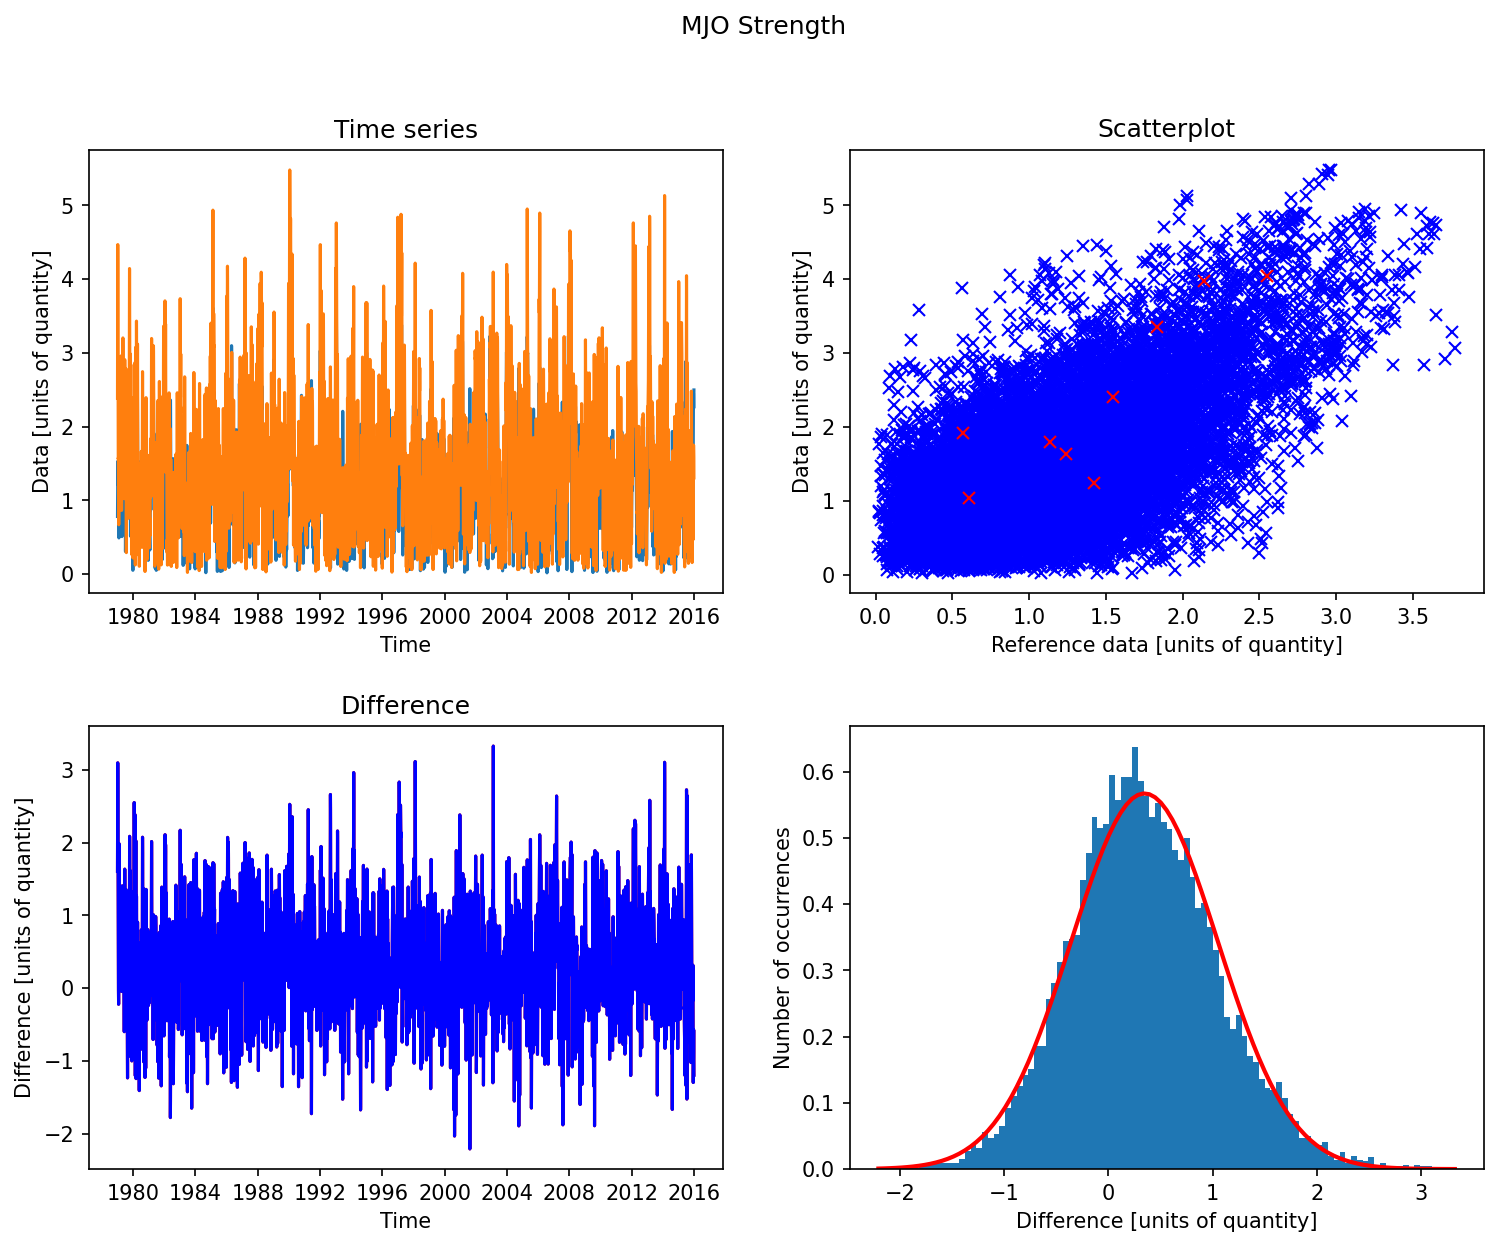

In [23]:
strength = np.sqrt(np.square(pcs.pc1) + np.square(pcs.pc2))
orig_strength = np.sqrt(np.square(orig_pcs.pc1) + np.square(orig_pcs.pc2))
fig = mjoindices.evaluation_tools.plot_timeseries_agreement(orig_strength, orig_pcs.time, strength, pcs.time, title="MJO Strength", do_print=True)
fig.show()

### Interactive Plotting of our calculated MJO

NOTE: per https://psl.noaa.gov/mjo/mjoindex/
<br>
For us to be able to plot this OMI index in the same phase space as the Wheeler-Hendon RMM index, the sign of the OMI PC1 is reversed and the PC ordering is switched, so that PC2 of the OMI is analogous to PC1 of RMM and -PC1 of OMI is analogous to PC2 of RMM.

In [44]:
# function to plot the data
def mjo_plot(year, month, day):
    # this just to prevent us from missing a refrence to the variable
    data = df
    
    if len(str(month)) < 2:
        month = "0" + str(month)
    if len(str(day)) < 2:
        day = "0" + str(day)
    
    # get the passed in year, month and day as a formatted string
    # to use to get the indexes we want
    strdate = str(year) + "-" + str(month) + "-" + str(day)
    
    # we are using this as an end index, so find it in the dataframe
    endindex = list(np.where(df["Date"] == strdate)[0])[0]+1
    # find the start index
    startindex = endindex - 40
    # prevent data from having negative indexes
    if endindex < 40:
        print("Selected a date that does not have 40 days previous data")
        return
 
    # get the sub-dataframe
    data = data[startindex:endindex]
    
    f, ax = plt.subplots(figsize=(10, 10))
    # get the middle circle
    circle = np.linspace(0,2*np.pi)
    x0 = np.cos(circle)
    y0 = np.sin(circle)
    
    # assign the axis limits
    plt.xlim([-4, 4])
    plt.ylim([-4, 4])
    
    # label the axies
    plt.xlabel("PC2")
    plt.ylabel("-PC1")
    
    # plot the circle
    ax.plot(x0,y0, linestyle='-', color='k',label='MJO threshold')
    ax.fill(x0, y0, "w", zorder=10)  
    
    # plot the first two lines to divide the plot into phases
    ax.axhline(0, color='black', linestyle="--", zorder=9)
    ax.axvline(0, color='black', linestyle='--', zorder=9)
    # plot the next two lines to divide the plot into phases
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle="--", color="black", zorder=9)
    ax.plot([4,-4],[-4,4], linestyle="--", color="black", zorder=9)

    # title the plot
    plt.title("(PC2,-PC1) phase space for " 
          + str(data.iloc[0].Date) + " to " +
          str(data.iloc[-1].Date))
    # add a start and stop text
    plt.text(data.iloc[0].PC2, data.iloc[0].PC1, 'START', zorder=11)
    plt.text(data.iloc[-1].PC2,data.iloc[-1].PC1, 'END', zorder=11)
    
    # label the phases
    plt.text(-3.5, -1.5, '1')
    plt.text(-1.5, -3.5, '2')
    plt.text(1.5, -3.5, '3')
    plt.text(3.5, -1.5, '4')
    plt.text(3.5, 1.5, '5')
    plt.text(1.5, 3.5, '6')
    plt.text(-1.5, 3.5, '7')
    plt.text(-3.5, 1.5, '8')
    
    # label the areas
    plt.text(-.46, -3.9, 'Indian Ocean')
    plt.text(3.8, -.7, 'Maritime Continent',rotation=-90)
    plt.text(-.6, 3.8, 'Western Pacific')
    plt.text(-3.8, -.5, 'W Hemi and Africa',rotation=90)
    
    # now the actual data
    ax.plot(data["PC2"], data["PC1"], zorder=11)
    plt.show()

In [45]:
df = pd.read_csv('MJO_Data/CalculatedData/PCs_new.txt', sep=',', header=None, skiprows=1, 
                 names=['Date','PC1','PC2'])
# For the interactive part, create a new column called date
# and concatanate all year month and day columns to
# year-month-day. This uses python lambda function
df['Date']=df['Date'].astype('str')

df[['year','month', 'day']] = df['Date'].str.split('-',expand=True)
df['PC1'] = df['PC1'] * -1

In [46]:
ans = interactive(mjo_plot, 
                  year=IntSlider(min=1836, max=int(df.iloc[-1].year), value=1933, step=1), 
                  month=IntSlider(min=1, max=12, value=1, step=1),
                  day=IntSlider(min=1, max=31, value=1, step=1))

display(ans)

interactive(children=(IntSlider(value=1933, description='year', max=2015, min=1836), IntSlider(value=1, descri…